<a href="https://colab.research.google.com/github/kurtsenol/DN617OZpbWPPO7Z5/blob/main/Call_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing Libraries and Dataset

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(10,6)})

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case/term-deposit-marketing-2020.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


### 2. Inspecting Data

In [3]:
# Inspect the shape of dataframe
df.shape

(40000, 14)

In [4]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
# Descriptive statistics for numeric features
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
# Descriptive statistics for object features
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


In [7]:
# check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [8]:
# check duplicated observations
df.duplicated().sum()

0

### 3. Exploratory Data Analysis

#### Age

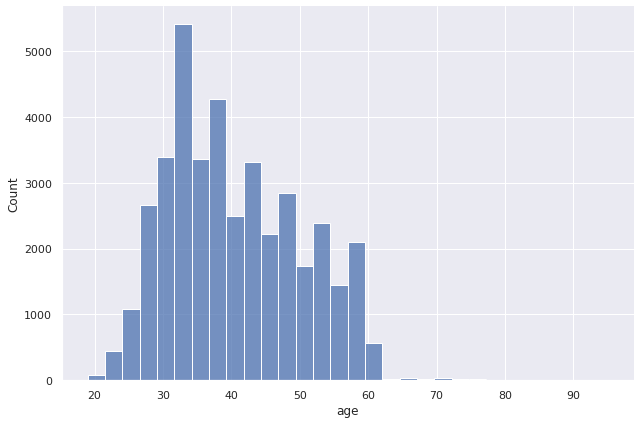

In [9]:
sns.displot(df.age, bins=30, height=6, aspect=1.5);

We see a right skewed plot on "age" histogram.

In [10]:
# summary statistics for age
df.groupby("y")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,37104.0,40.599208,9.525450,19.0,33.0,39.0,48.0,94.0
yes,2896.0,39.844959,11.001984,19.0,31.0,37.0,47.0,95.0


We can't see a salient difference between subscribed and not subscribed customers related to "age" feature.

In [11]:
from scipy.stats import boxcox

# Box-Cox log transformation
df["age"] = boxcox(df["age"], lmbda=0.0)

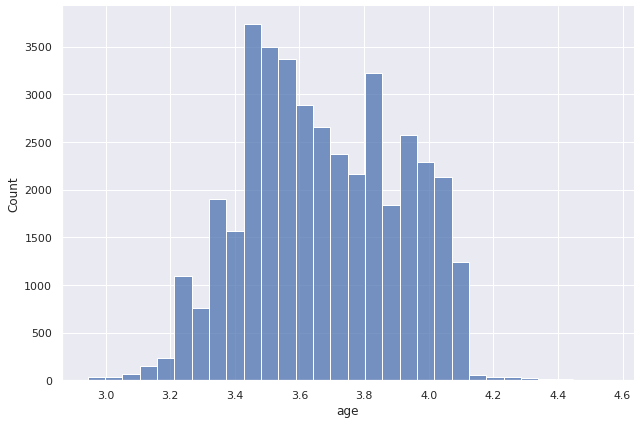

In [12]:
sns.displot(df.age, bins=30, height=6, aspect=1.5);

#### Balance

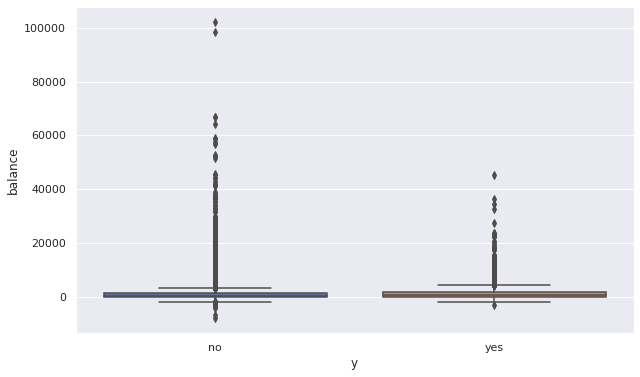

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',y='balance', data=df);

Because of high variance and outliers in "balance", we **can not** get a clear understanding from the above plot. 

We can calculate the summary statistics for the balance, grouped by the target feature.

In [14]:
df.groupby('y')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,37104.0,1249.752533,2900.722436,-8019.0,50.0,395.0,1286.0,102127.0
yes,2896.0,1588.495856,2924.894429,-3058.0,141.0,620.0,1820.5,45248.0


Winsorize 'balance' with 5% upper and lower limits can provide a better graph.

In [15]:
from scipy.stats.mstats import winsorize

# Winsorize 'balance' with 5% upper and lower limits 
df["balance"] = winsorize(df['balance'], limits=[0.05, 0.05])

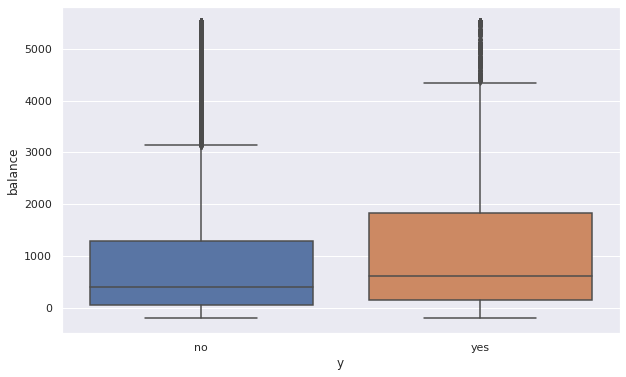

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',y='balance', data=df);

The median balance of subscribed customers is slightly higher than that of not subscribed customers. 

#### Duration

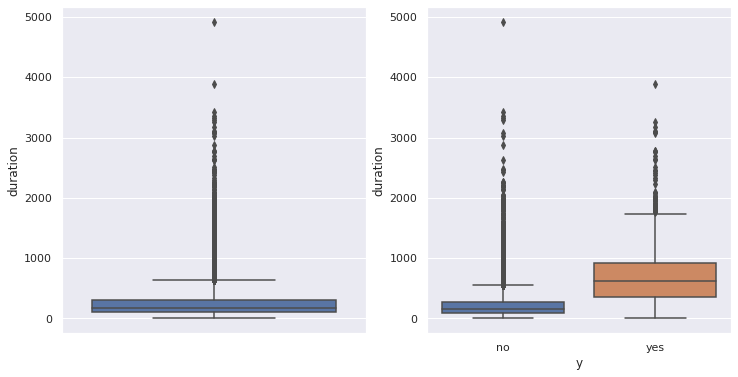

In [17]:
# Univariate and Multivariate boxplot
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(y=df['duration'], ax=ax[0])
sns.boxplot(x='y', y='duration', data=df, ax=ax[1]);

Winsorizing upper 1 percent can provide a better graph.

In [18]:
df["duration"] = winsorize(df['duration'], limits=[None, 0.01])

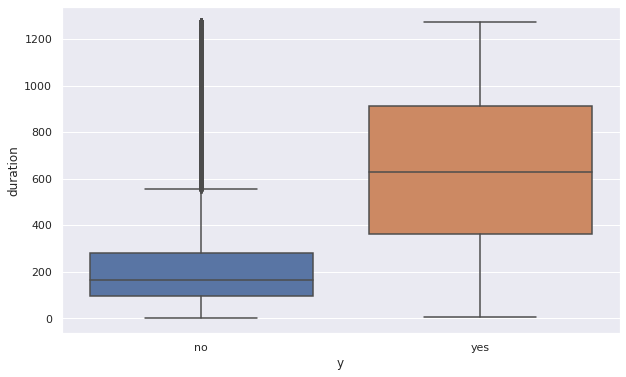

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',y='duration', data=df);

It can be clearly seen that, on average, last contact durations of subscribed customers are higher than those of not subscribed customers.

#### job


In [20]:
df.job.value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

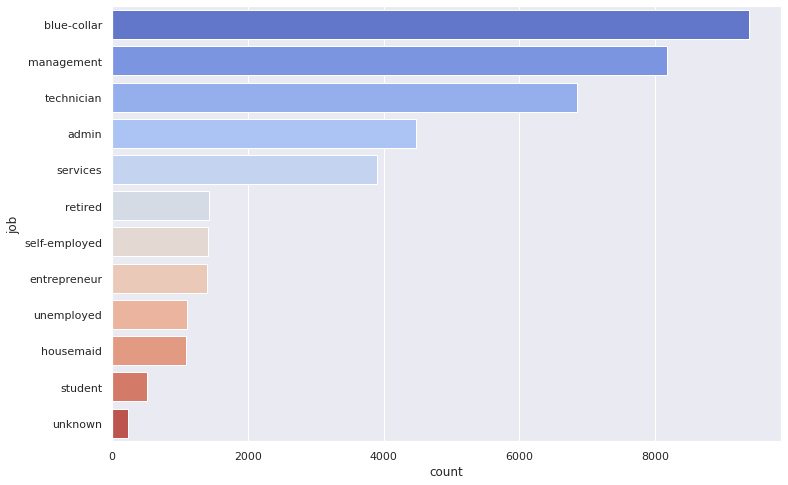

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(y='job', data=df, order= df.job.value_counts().index, palette="coolwarm");

Top 3 "job" types in the dataset are blue-collar, management and technician.

We can get subscription percentage of each job type as below: 

In [22]:
df_job = df.groupby("job")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_job

,job,y,percentage
16,student,no,0.843511
10,retired,no,0.894920
20,unemployed,no,0.913043
8,management,no,0.917218
12,self-employed,no,0.920792
0,admin,no,0.921704
18,technician,no,0.927466
22,unknown,no,0.927660
4,entrepreneur,no,0.937367
14,services,no,0.939130


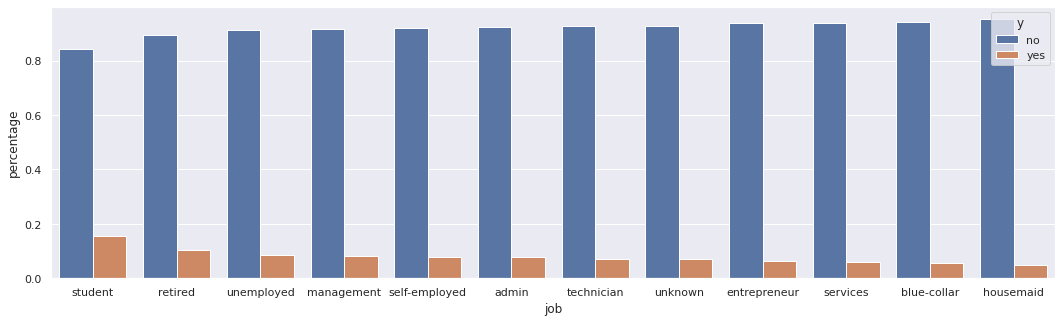

In [23]:
plt.figure(figsize=(18,5))
sns.barplot(x='job', y="percentage", data=df_job, hue='y');

As can bee seen, students has the highest subscription percentage. Then it comes the retired customers. 

#### marital

In [24]:
df.marital.value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

In [25]:
df_marital = df.groupby("marital")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_marital

,marital,y,percentage
4,single,no,0.905685
0,divorced,no,0.917249
2,married,no,0.939391
3,married,yes,0.060609
1,divorced,yes,0.082751
5,single,yes,0.094315


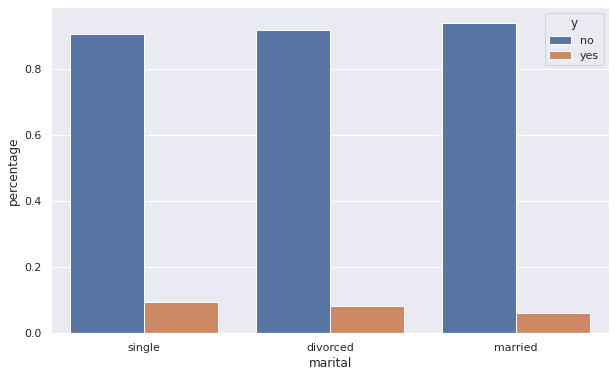

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital', y="percentage", data=df_marital, hue='y');

As can bee seen, single customers has higher subscription percentage than divorced and married customers.

#### education

In [27]:
df.education.value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [28]:
df_education = df.groupby("education")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_education

,education,y,percentage
4,tertiary,no,0.908174
2,secondary,no,0.932454
6,unknown,no,0.937296
0,primary,no,0.943700
1,primary,yes,0.056300
7,unknown,yes,0.062704
3,secondary,yes,0.067546
5,tertiary,yes,0.091826


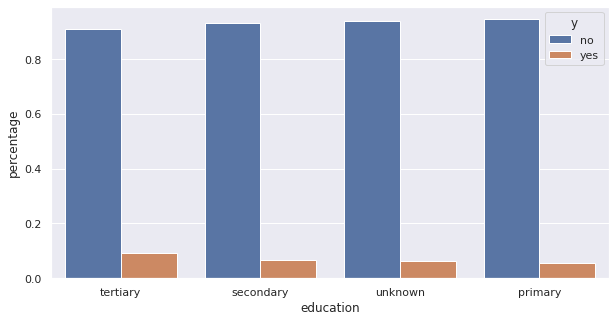

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='education', y="percentage", data=df_education, hue='y');

In [30]:
# df.education.replace(['primary', 'secondary', 'unknown'], 'other', inplace=True)

#### default

In [31]:
df.default.value_counts()

no     39191
yes      809
Name: default, dtype: int64

In [32]:
df.default.value_counts(normalize=True)

no     0.979775
yes    0.020225
Name: default, dtype: float64

In [33]:
df_default = df.groupby("default")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_default

,default,y,percentage
0,no,no,0.927356
2,yes,no,0.939431
3,yes,yes,0.060569
1,no,yes,0.072644


#### housing

In [34]:
df.housing.value_counts()


yes    24031
no     15969
Name: housing, dtype: int64

In [35]:
df_housing = df.groupby("housing")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_housing

,housing,y,percentage
0,no,no,0.910326
2,yes,no,0.939079
3,yes,yes,0.060921
1,no,yes,0.089674


#### loan

In [36]:
df.loan.value_counts()


no     33070
yes     6930
Name: loan, dtype: int64

In [37]:
df_loan = df.groupby("loan")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_loan

,loan,y,percentage
0,no,no,0.923919
2,yes,no,0.945166
3,yes,yes,0.054834
1,no,yes,0.076081


#### contact

In [38]:
df.contact.value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

In [39]:
df_contact = df.groupby("contact")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_contact

,contact,y,percentage
0,cellular,no,0.910372
2,telephone,no,0.928479
4,unknown,no,0.961065
5,unknown,yes,0.038935
3,telephone,yes,0.071521
1,cellular,yes,0.089628


#### month

In [40]:
df.month.value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

In [41]:
df_month = df.groupby("month")["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"])
df_month

,month,y,percentage
21,oct,no,0.387500
14,mar,no,0.515504
0,apr,no,0.834069
6,feb,no,0.888937
4,dec,no,0.923077
12,jun,no,0.937896
18,nov,no,0.938855
10,jul,no,0.939812
16,may,no,0.941546
2,aug,no,0.944775


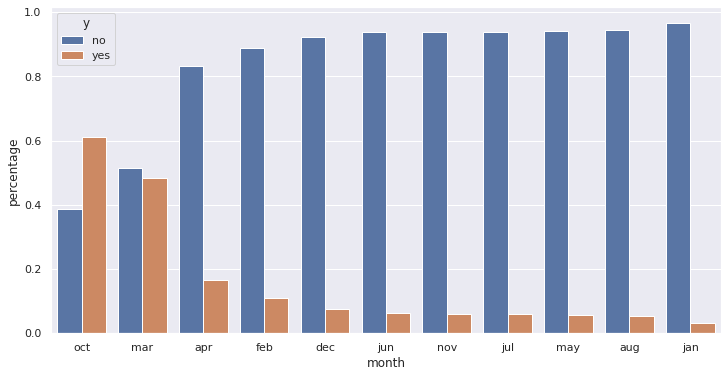

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y="percentage", data=df_month, hue='y');

In October and March, the subscription percentages are high, but there are not many observations in these months. 

#### campaign

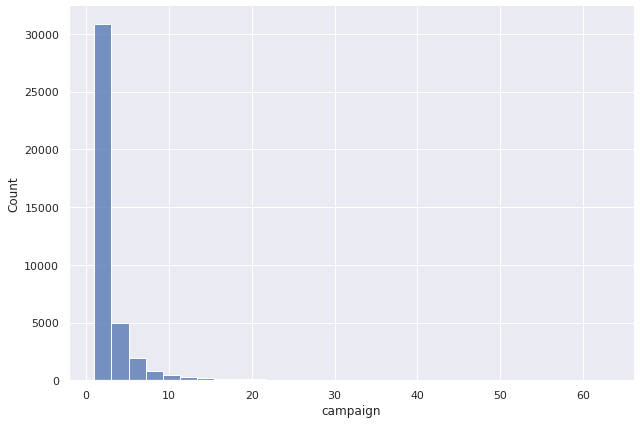

In [43]:
sns.displot(df.campaign, bins=30, height=6, aspect=1.5);

In [44]:
df.groupby('y')['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,37104.0,2.918688,3.298031,1.0,1.0,2.0,3.0,63.0
yes,2896.0,2.414365,2.306015,1.0,1.0,2.0,3.0,32.0


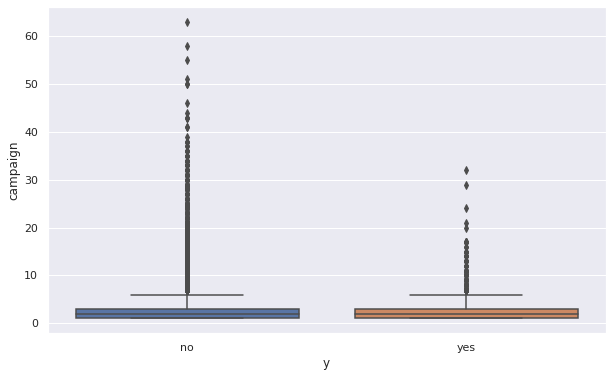

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',y='campaign', data=df);

Winsorizing upper 1 percent can provide a better graph.

In [46]:
df["campaign"] = winsorize(df['campaign'], limits=[None, 0.01])

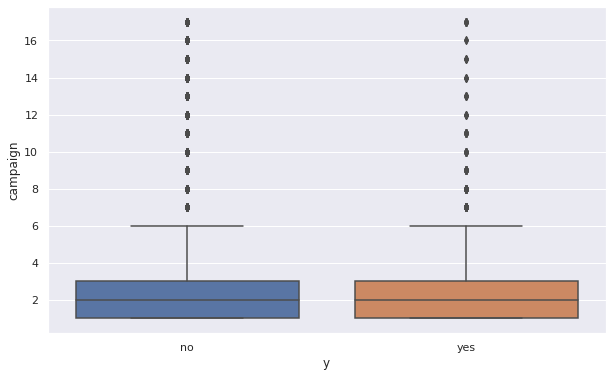

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y',y='campaign', data=df);

As can be seen, distribution of number of contacts performed during this campaign for subscribed and not subscribed customers look very similar. 

#### y


In [48]:
df.y.value_counts(normalize=True)

no     0.9276
yes    0.0724
Name: y, dtype: float64

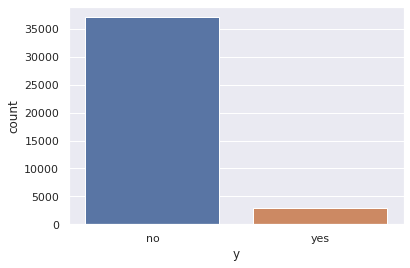

In [49]:
sns.countplot(x=df['y']);

We have a imbalanced dataset with majority of observations being of one type ('No') in our case. We have about 93% of observations having 'No' and only around 7% of 'Yes' and hence this is an imbalanced dataset.

### Drop unneccarry columns and perform encoding

In [50]:
df = df.drop(['day', 'month', "campaign", "default"], axis=1)
df.head()

,age,job,marital,education,balance,housing,loan,contact,duration,y
0,4.060443,management,married,tertiary,2143,yes,no,unknown,261,no
1,3.784190,technician,single,secondary,29,yes,no,unknown,151,no
2,3.496508,entrepreneur,married,secondary,2,yes,yes,unknown,76,no
3,3.850148,blue-collar,married,unknown,1506,yes,no,unknown,92,no
4,3.496508,unknown,single,unknown,1,no,no,unknown,198,no


In [51]:
df.y.replace({"no":0, "yes":1}, inplace=True)

In [52]:
# encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,duration,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,4.060443,2143,261,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
1,3.784190,29,151,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
2,3.496508,2,76,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1
3,3.850148,1506,92,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,3.496508,1,198,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1


### 4. Model 

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [54]:
X = df.drop('y', axis=1)
y = df['y']

In [55]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
sc = RobustScaler().fit(X_train)

In [56]:
# scaling
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [57]:
# logistic regression 
clf_lr_1 = LogisticRegression()
clf_lr_1.fit(X_train, y_train)
y_pred = clf_lr_1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

[[9151  138]
 [ 519  192]]
accuracy score:  0.9343


In [58]:
# logistic regression with adjusted weights for target variable
clf_lr_2 = LogisticRegression(class_weight="balanced")
clf_lr_2.fit(X_train, y_train)
y_pred = clf_lr_2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("accuracy score: ", accuracy_score(y_test, y_pred))

[[7920 1369]
 [ 164  547]]
accuracy score:  0.8467


In [59]:
# cross validated logistic regression
clf_lr_3 = LogisticRegression(class_weight="balanced")
clf_pipe = make_pipeline(RobustScaler(), clf_lr_3)
scores = cross_val_score(clf_pipe, X, y, cv=5, scoring="accuracy")
print("mean accuracy score: ", scores.mean().round(3))
print("min accuracy score: ", scores.min().round(3))
print("max accuracy score: ", scores.max().round(3))

mean accuracy score:  0.838
min accuracy score:  0.785
max accuracy score:  0.949


In [60]:
# hyperparameter tuning
import warnings
warnings.filterwarnings('ignore')

# Create the hyperparameter grid
param_grid = {"solver": ["lbfgs", "liblinear", "saga"], "penalty": ["l1", "l2", "elasticnet"], "l1_ratio":[None, 0.3,0.7],
              "C": [0.01, 0.1, 1, 10], "class_weight":["balanced"]}


# Instantiate classifier and GridSearchCV, fit
clf_lr = LogisticRegression(random_state=21)
lr_cv = RandomizedSearchCV(clf_lr, param_grid, cv=5, scoring="roc_auc", refit=True)
lr_cv.fit(X, y)

# Print the best estimator, optimal parameters and best score
print("Best Estimator: ", lr_cv.best_estimator_)
print("Tuned Parameters: {}".format(lr_cv.best_params_))
print("Tuned ROC AUC Score: {}".format(lr_cv.best_score_.round(3)))

Best Estimator:  LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=0.7,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=21, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Tuned Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'l1_ratio': 0.7, 'class_weight': 'balanced', 'C': 0.1}
Tuned ROC AUC Score: 0.885


Since this is an unbalanced dataset, I optimized it for "ROC AUC" score, not for "Accuracy". Below we can see the cross validated accuracy score for tuned model:


In [61]:
scores_lr_cv = cross_val_score(lr_cv.best_estimator_, X, y, cv=5, scoring="accuracy")
print("mean accuracy score: ", scores_lr_cv.mean().round(3))

mean accuracy score:  0.843


### LinearSVC

In [62]:
#cross validated SVC
svc_1 = LinearSVC(class_weight="balanced", random_state=21)
scores_svc_cv = cross_val_score(svc_1, X, y, cv=5, scoring='accuracy')
print(scores_svc_cv.mean().round(3))

0.926


In [63]:
# Create the hyperparameter grid
param_grid =  {"penalty": ["l1", "l2"], 'C': [0.01, 0.1, 1],  "class_weight":["balanced"]}

# Instantiate classifier and GridSearchCV, fit
clf_svc = LinearSVC(random_state=21)
svc_cv = GridSearchCV(clf_svc, param_grid, cv=5, scoring="roc_auc", refit=True)
svc_cv.fit(X, y)

# Print the best estimator, optimal parameters and best score
print("Best Estimator: ", svc_cv.best_estimator_)
print("Tuned Parameters: {}".format(svc_cv.best_params_))
print("Tuned ROC AUC Score: {}".format(svc_cv.best_score_.round(3)))

Best Estimator:  LinearSVC(C=0.1, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=21, tol=0.0001,
          verbose=0)
Tuned Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Tuned ROC AUC Score: 0.807


In [64]:
scores_svc_cv = cross_val_score(svc_cv.best_estimator_, X, y, cv=5, scoring="accuracy")
print("mean accuracy score: ", scores_svc_cv.mean().round(3))

mean accuracy score:  0.901


### RandomForestClassifier

In [65]:
#cross validated random forest
rf_1 = RandomForestClassifier(n_estimators=150, max_depth=6, class_weight="balanced", random_state=21)
scores_rf_cv = cross_val_score(rf_1, X, y, cv=5, scoring='accuracy')
print(scores_rf_cv.mean().round(3))

0.854


In [66]:
# Create the hyperparameter grid
param_grid = {"criterion": ["gini"], "min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10],"max_features": [None, "auto", "log2"],
              "n_estimators":[50,150,500], "class_weight":["balanced"]}

# Instantiate classifier and GridSearchCV, fit
clf_rf = RandomForestClassifier(random_state=21)
rf_cv = RandomizedSearchCV(clf_rf, param_grid, cv=5, scoring="roc_auc", refit=True)
rf_cv.fit(X, y)

# Print the best estimator, optimal parameters and best score
print("Best Estimator: ", rf_cv.best_estimator_)
print("Tuned Parameters: {}".format(rf_cv.best_params_))
print("Tuned ROC AUC Score: {}".format(rf_cv.best_score_.round(3)))

Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)
Tuned Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced'}
Tuned ROC AUC Score: 0.871


In [67]:
scores_rf_cv = cross_val_score(rf_cv.best_estimator_, X, y, cv=5, scoring="accuracy")
print("mean accuracy score: ", scores_rf_cv.mean().round(3))

mean accuracy score:  0.857


### Model Summary

**We get 84.3% average accuracy with Logistic Regression, 90% average accuracy with Linear SVC and 85.7% average accuracy with Random Forest Classifier.** Since we have an imbalance dataset and the goal is to achieve 81% or above accuracy, I try to optimize "roc auc" score rather than the "accuracy".

### Segments of customers to prioritize

In [68]:
df_1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case/term-deposit-marketing-2020.csv")
df_1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [69]:
# summary statistics for "age" variable
df_1.age.describe()

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [70]:
# categorize "age" variable
labels = ['Adult (19-29)', 'Middle Age (30-49)', 'Old (50-95)']
bins=[0,29,49,95]
df_1["age"] = pd.cut(df_1['age'], bins=bins, labels=labels)


In [71]:
# build segments based on their "age", "job" and "education" categories,
# then sort them by subscription percentage
df_segments = df_1.groupby(["age", "job", "education"])["y"].value_counts(normalize=True).reset_index(name="percentage").sort_values(["y", "percentage"], ascending=False)
df_segments.head(10)

,age,job,education,y,percentage
28,Adult (19-29),management,primary,yes,0.500000
50,Adult (19-29),student,primary,yes,0.307692
65,Adult (19-29),unemployed,primary,yes,0.285714
26,Adult (19-29),housemaid,tertiary,yes,0.250000
7,Adult (19-29),admin,unknown,yes,0.230769
73,Adult (19-29),unknown,secondary,yes,0.222222
17,Adult (19-29),entrepreneur,primary,yes,0.200000
137,Middle Age (30-49),student,primary,yes,0.200000
37,Adult (19-29),self-employed,secondary,yes,0.186047
48,Adult (19-29),services,unknown,yes,0.181818


In [72]:
# Assign segment number
df_segments = df_segments[["age", "job", "education", "percentage"]].reset_index(drop=True).rename_axis('Segment No').reset_index()
df_segments["Segment No"] =df_segments["Segment No"]+1
df_segments.head(4)


,Segment No,age,job,education,percentage
0,1,Adult (19-29),management,primary,0.500000
1,2,Adult (19-29),student,primary,0.307692
2,3,Adult (19-29),unemployed,primary,0.285714
3,4,Adult (19-29),housemaid,tertiary,0.250000


**The segments are sorted based on their subscription percentage and Top 4 segments can be seen from above table. The company should prioritize customers in this order. For example, first segment consists of customers whose age are between 19 and 29, whose job is management, whose education level is primary.**

### What makes the customers buy?

In [73]:
pd.DataFrame({"Faeture": df.iloc[:, :-1].columns,
              "Feature Importances" : rf_cv.best_estimator_.feature_importances_.round(3)}).sort_values("Feature Importances", ascending=False).head(3)

,Faeture,Feature Importances
2,duration,0.743
22,contact_telephone,0.085
1,balance,0.041


**As can be seen from above table, the most important feature is "duration". EDA results also depicted us that last contact durations of subscribed customers are significantly higher than those of not subscribed customers.**